In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
iris = pd.read_csv("C:/Users/Kiran/OneDrive/Desktop/New/ML/IRIS.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()
iris.species.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()
# This indicates there are no missing values in the data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

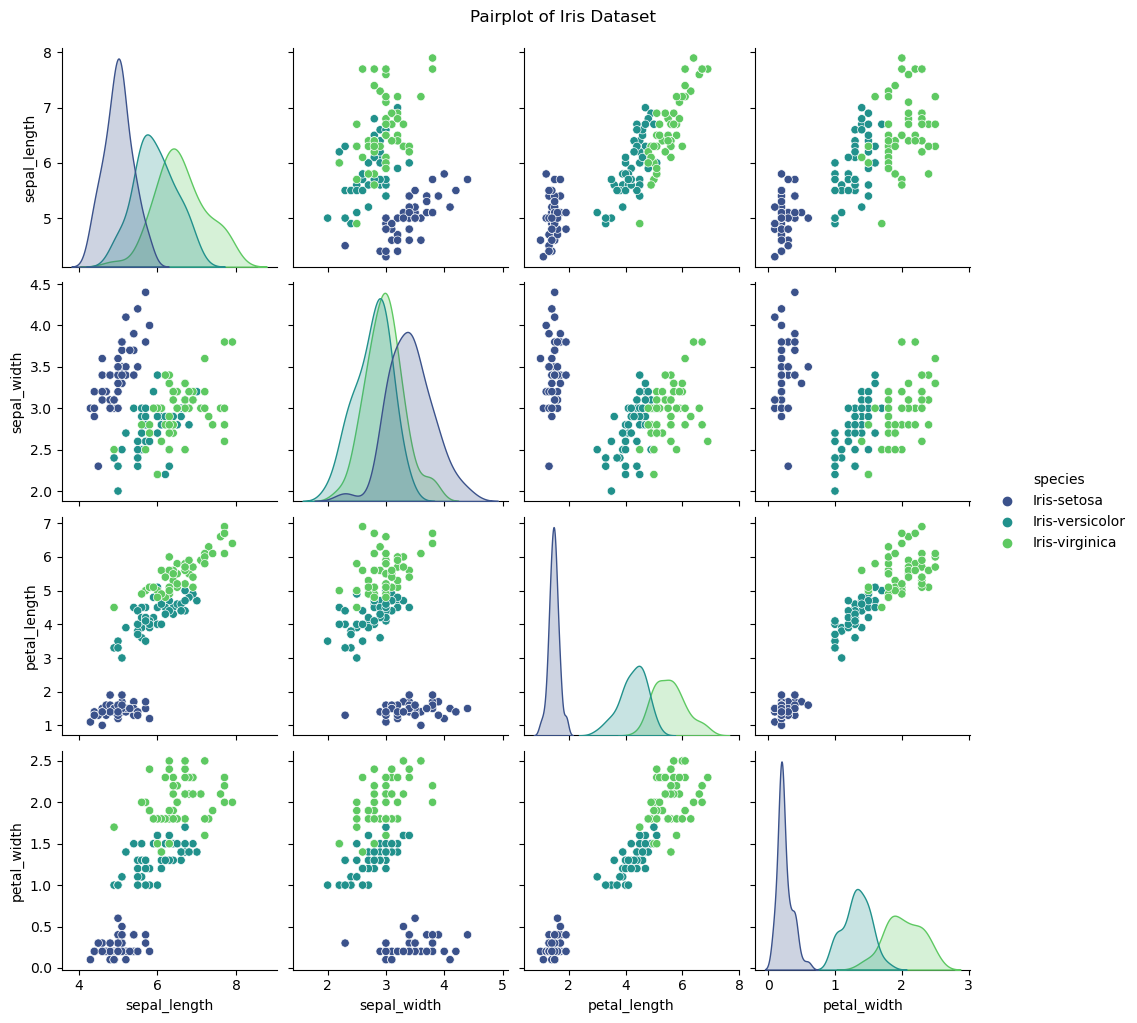

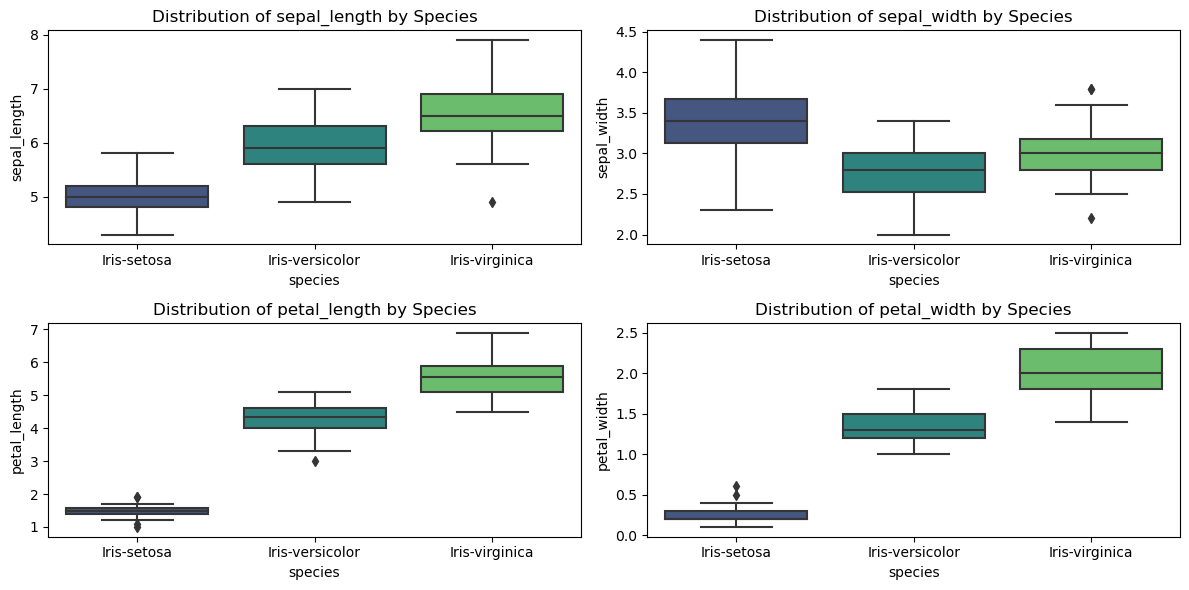

In [7]:
# Pairplot to visualize relationships between pairs of features
sns.pairplot(iris, hue='species', palette='viridis')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Boxplot to visualize the distribution of each feature for each species
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.columns[:-1]):  # Exclude the 'species' column
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris, palette='viridis')
    plt.title(f'Distribution of {feature} by Species')

plt.tight_layout()
plt.show()


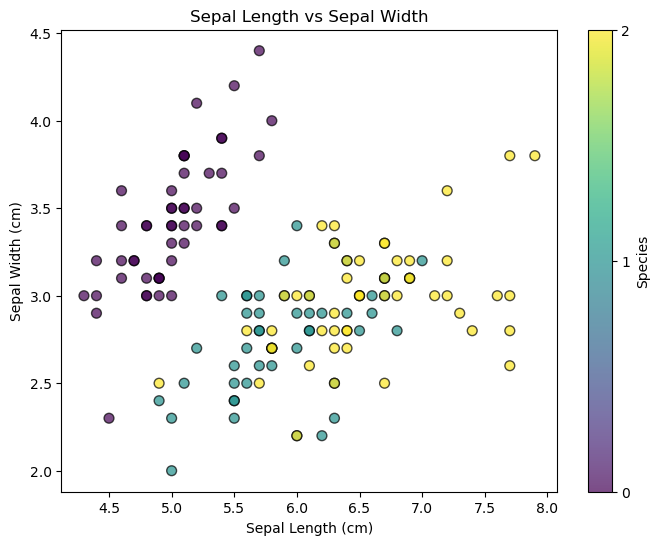

In [8]:
# Map species names to numerical labels
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['species_numerical'] = iris['species'].map(species_mapping)
# Scatter plot of sepal length vs sepal width
x = iris["sepal_length"]
y = iris["sepal_width"]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=iris["species_numerical"] ,cmap='viridis', edgecolors='k', s=50, alpha=0.7)
plt.colorbar(label='Species', ticks=[0, 1, 2], orientation='vertical')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width")
plt.show()

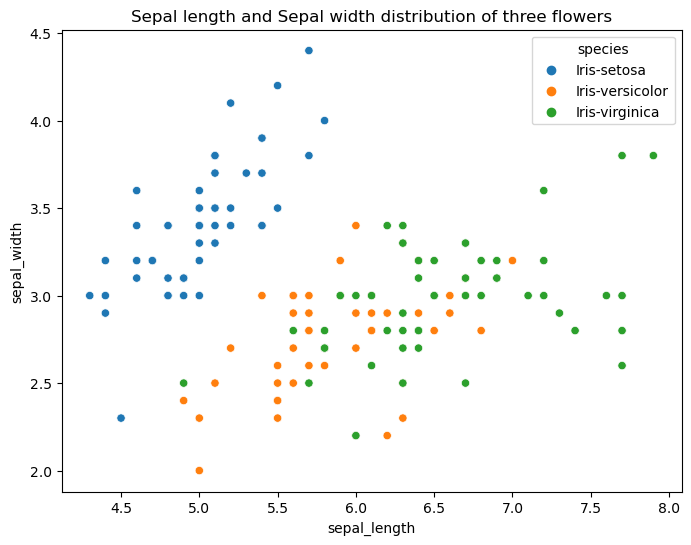

In [9]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species).set_title("Sepal length and Sepal width distribution of three flowers");

# Modelling

In [10]:
# Map the species names to numerical Labels
le = LabelEncoder()
iris['species_numerical'] = le.fit_transform(iris['species'])

# Split the data into training and testing sets
X = iris.drop(['species', 'species_numerical'], axis=1)
y = iris['species_numerical']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LinearSVC Model
linear_svc=LinearSVC() 
linear_svc.fit(X_train,y_train)
y_pred_train=linear_svc.predict(X_train)
acc_linear_svc = accuracy_score(y_train, y_pred_train)*100
print("LINEAR SVC MODEL :\n")
print("Accuracy of Train Data is = ", acc_linear_svc, "%")

# Make predictions on the test set
y_pred = linear_svc.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nTEST DATA :")
print(f"Accuracy: {accuracy:.2f}")
print("Accuracy of Test Data is = ", accuracy*100, "%\n")
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_mat)

LINEAR SVC MODEL :

Accuracy of Train Data is =  97.5 %

TEST DATA :
Accuracy: 1.00
Accuracy of Test Data is =  100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

y_pred_train=linear_svc.predict(X_train)
acc_linear_svc = accuracy_score(y_train, y_pred_train)*100
print("LINEAR SVC MODEL :\n")
print("Accuracy of Train Data is = ", acc_linear_svc, "%")

# Summary of the predictions made by the KNN
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\nAccuracy of KNN Model is',accuracy_score(y_pred,y_test)*100,"%\n")

LINEAR SVC MODEL :

Accuracy of Train Data is =  97.5 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy of KNN Model is 100.0 %



In [12]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_train=linear_svc.predict(X_train)
acc_linear_svc = accuracy_score(y_train, y_pred_train)*100
print("LINEAR SVC MODEL :\n")
print("Accuracy of Train Data is = ", acc_linear_svc, "%")

# Summary of the predictions made by the Logistic Reg//Accuracy Score
print("\n Logistic Regression :\n")
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\nAccuracy is : ',accuracy_score(y_pred,y_test)*100,"%\n")

LINEAR SVC MODEL :

Accuracy of Train Data is =  97.5 %

 Logistic Regression :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy is :  100.0 %

